# Using the simplest possible power parameterisation

## Create a random trajectory

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(12345)

In [3]:
N_points = 100

trajectory = pd.DataFrame(dict(
    u_ship_og=12 + 0.1 * np.random.normal(size=(N_points, )),
    v_ship_og=3 + 0.1 * np.random.normal(size=(N_points, )),
    u_current=2.0 * np.random.normal(size=(N_points, )),
    v_current=2.0 * np.random.normal(size=(N_points, )),
))

In [4]:
display(trajectory)

,u_ship_og,v_ship_og,u_current,v_current
0,11.979529,2.843434,2.254962,3.494467
1,12.047894,2.943746,-1.136727,-2.820492
2,11.948056,2.996734,0.618724,-0.756483
3,11.944427,2.907099,-1.154771,-0.691641
4,12.196578,2.951743,-2.337268,0.760125
...,...,...,...,...
95,12.079525,3.091098,-0.451048,0.262203
96,12.011811,2.897910,2.699452,-1.395228
97,11.925147,2.858658,2.700599,2.671299
98,12.058497,3.129661,-0.773307,-0.302078


## Estimate power needed to maintain speed over ground

In [5]:
from rasmus_fuel.simplest import power_maintain_sog, power_to_fuel_burning_rate

In [6]:
coefficient = 1.0

In [7]:
trajectory["power"] = power_maintain_sog(**trajectory, coeff=coefficient)

In [8]:
trajectory["fuel_rate"] = power_to_fuel_burning_rate(trajectory["power"])

In [9]:
display(trajectory)

,u_ship_og,v_ship_og,u_current,v_current,power,fuel_rate
0,11.979529,2.843434,2.254962,3.494467,1117.364353,0.000053
1,12.047894,2.943746,-1.136727,-2.820492,2529.913503,0.000120
2,11.948056,2.996734,0.618724,-0.756483,1749.777352,0.000083
3,11.944427,2.907099,-1.154771,-0.691641,2267.591153,0.000108
4,12.196578,2.951743,-2.337268,0.760125,2700.526265,0.000129
...,...,...,...,...,...,...
95,12.079525,3.091098,-0.451048,0.262203,2056.733168,0.000098
96,12.011811,2.897910,2.699452,-1.395228,1274.605855,0.000061
97,11.925147,2.858658,2.700599,2.671299,1019.888809,0.000049
98,12.058497,3.129661,-0.773307,-0.302078,2197.932609,0.000105


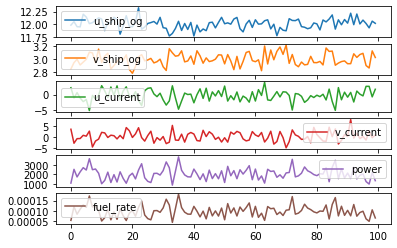

In [10]:
trajectory.plot(subplots=True);